In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [59]:
data = pd.read_csv('titanic.csv')

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
data = data[['Age','Survived']]

In [62]:
data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [63]:
len(data)

891

In [64]:
m = 0
b = 0

In [66]:
x = data['Age']

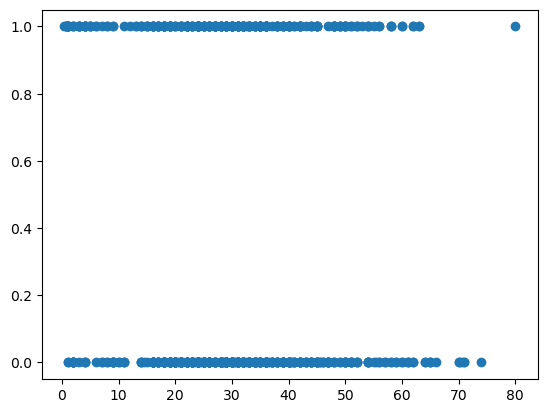

In [67]:
plt.scatter(data['Age'],data['Survived'])

In [68]:
data = data.drop(data[data['Age'].isna()].index)

In [69]:
data = data.drop(data[(data['Age'] > 50)&(data['Survived'] == 0)].index)

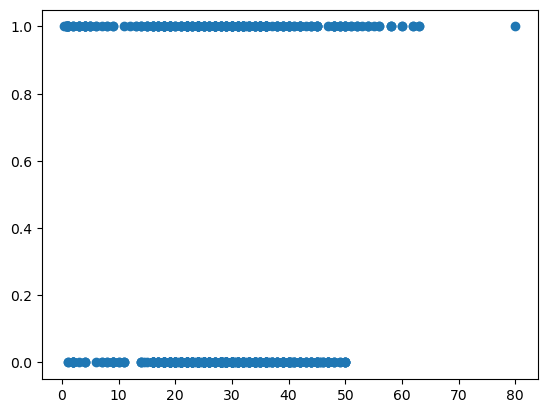

In [70]:
plt.scatter(data['Age'],data['Survived'])

In [71]:
data = data.drop(data[(data['Age'] < 50)&(data['Survived'] == 1)].index)

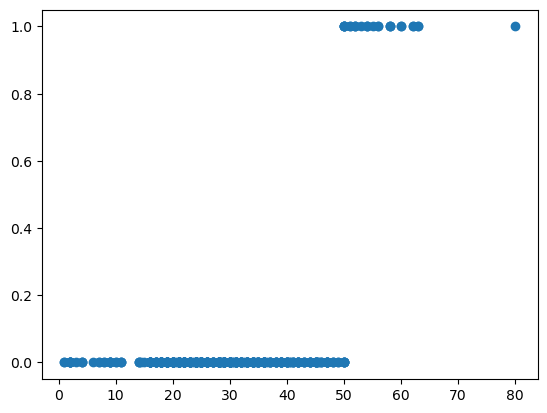

In [113]:
plt.scatter(data['Age'],data['Survived'])

In [92]:
data = data.reset_index()

In [95]:
def grad_descent(w_old, b_old, data, L):
    delw, delb = 0, 0
    for i in range(len(data['Age'])):
        delw += data['Age'][i]*((1/(1+np.exp(-w_old*data['Age'][i]-b_old)))-data['Survived'][i])
        delb += ((1/(1+np.exp(-w_old*data['Age'][0]-b_old)))-data['Survived'][i])
    w = w_old - (L/len(data['Age']))*delw
    b = b_old - (L/len(data['Age']))*delb
    return w, b

In [110]:
epoch = 1000
w,b = 0,0
L = 0.001
for i in range(epoch):
    w,b = grad_descent(w,b,data,L)

In [111]:
b

-0.13915497866470464

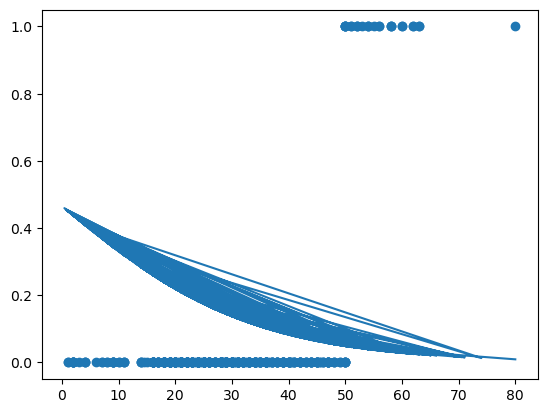

In [112]:
plt.scatter(data['Age'],data['Survived'])
plt.plot(x, 1/(1+np.exp(-w*x - b)))